In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
import gymnasium as gym
from collections import defaultdict

In [36]:
env = gym.make('CliffWalking-v0')
numactions = env.action_space.n
numstates = env.observation_space
print(numactions, numstates)

4 Discrete(48)


In [37]:
def epsilon_greedy(env,Q,epsilon):
  def policy(state):
    if state in Q:
      if np.random.rand() < epsilon:
        return np.random.choice(env.action_space.n)
      else: 
        return np.argmax(Q[state])
    else:
      return np.random.choice(env.action_space.n)
  return policy

In [38]:
def qlearning(env,numeps,epsilon,alpha,gamma):
  Q = defaultdict(lambda: np.zeros(env.action_space.n))
  for i in range(numeps):
    if i % 5000 == 0:
      print(f'Episode {i}')
    
    policy = epsilon_greedy(env,Q,epsilon)
    state, _ = env.reset()
    done = False
    
    while not done:
      action = policy(state)
      tup = env.step(action)
      next_state, reward, terminated, truncated = tup[0], tup[1], tup[2], tup[3]
      done = terminated or truncated
      action_greedy = np.argmax(Q[next_state])
      Q[state][action] = Q[state][action] + alpha*(reward + gamma*Q[next_state][action_greedy] - Q[state][action])
      state = next_state
  
  def deterministic_greedy(state):
    return np.argmax(Q[state])
 
  return Q, deterministic_greedy   
  

In [39]:
numeps = 10000
epsilon = 0.1
alpha = 0.1
gamma = 1.0

In [40]:
Q, policy = qlearning(env,numeps,epsilon,alpha,gamma)

Episode 0
Episode 5000


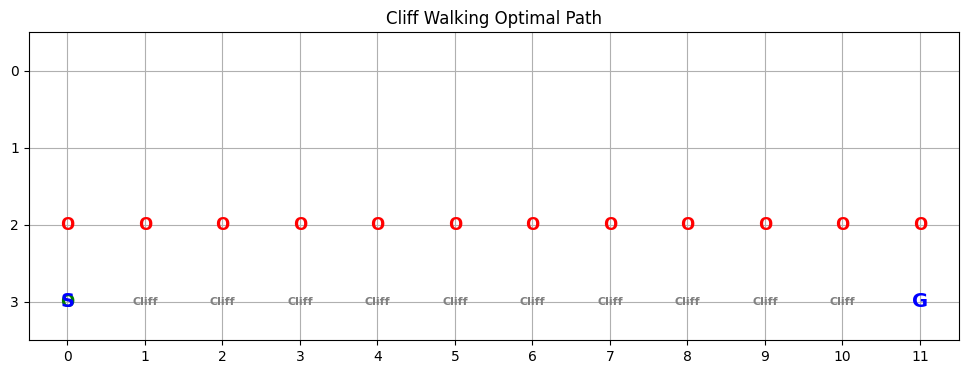

In [42]:
def plot_cliffwalking_paths(Q, env, policy):
    grid_rows, grid_cols = 4, 12  # Grid dimensions for CliffWalking-v0
    start_state = 36  # Start state index
    goal_state = 47   # Goal state index

    # Initialize the grid
    grid = np.zeros((grid_rows, grid_cols), dtype=int)

    # Define the cliff area
    cliff_indices = np.arange(37, 47)
    for idx in cliff_indices:
        row, col = divmod(idx, grid_cols)
        grid[row, col] = -100  # Cliff cells

    # Compute the optimal path
    state, _ = env.reset()
    optimal_path = []
    done = False
    while not done:
        row, col = divmod(state, grid_cols)
        optimal_path.append((row, col))
        action = policy(state)
        tup = env.step(action)
        state, _, done, _ = tup if len(tup) == 4 else (tup[0], tup[1], tup[2], None)

    # Mark the start and goal positions
    start_row, start_col = divmod(start_state, grid_cols)
    goal_row, goal_col = divmod(goal_state, grid_cols)

    # Plot the grid
    plt.figure(figsize=(12, 4))
    for r in range(grid_rows):
        for c in range(grid_cols):
            if (r, c) in optimal_path:
                color = "red" if (r, c) != (start_row, start_col) and (r, c) != (goal_row, goal_col) else "green"
                plt.text(c, r, 'O', ha='center', va='center', color=color, fontsize=12, fontweight='bold')
            elif grid[r, c] == -100:
                plt.text(c, r, 'Cliff', ha='center', va='center', color='gray', fontsize=8, fontweight='bold')

    # Highlight start and goal
    plt.text(start_col, start_row, 'S', ha='center', va='center', color='blue', fontsize=14, fontweight='bold')
    plt.text(goal_col, goal_row, 'G', ha='center', va='center', color='blue', fontsize=14, fontweight='bold')

    # Draw the grid
    plt.xlim(-0.5, grid_cols - 0.5)
    plt.ylim(grid_rows - 0.5, -0.5)
    plt.xticks(range(grid_cols))
    plt.yticks(range(grid_rows))
    plt.grid(True)
    plt.title("Cliff Walking Optimal Path")
    plt.show()

# Plot the optimal path
plot_cliffwalking_paths(Q, env, policy)
